In [4]:
import csv
import matplotlib.pyplot as plt
import numpy as np

'''
Задание 2. Часть 1 и 2
'''

class DayTrade(object):
    def __init__(self, ticker, per, date, time, close, vol):
        self.ticker = ticker
        self.per = per
        self.date = date
        self.time = time
        self.close = close
        self.vol = vol
    

def reader(path):
    days = []
    with open(path, 'r', encoding='utf=8') as file:
        reader = csv.DictReader(file, delimiter=';')
        for row in reader:
            days.append(DayTrade(*row.values()))
    return days

def data_creator(days):
    data = []
    result_data = []
    data.append(['TICKER', 'DATE', 'CLOSE', 'VOL'])
    
    for index in range(len(days)):  
        data.append([days[index].ticker, days[index].date, days[index].close, days[index].vol])
    fieldnames = data[0]
    
    for values in data[1:]:
        result_data.append(dict(zip(fieldnames, values)))
    
    return fieldnames, result_data

def writer(path, fieldnames, data):
    with open(path, 'w', newline='', encoding='utf=8') as output:
        writer = csv.DictWriter(output, delimiter=';', fieldnames=fieldnames)
        writer.writeheader()
        for row in data:
            writer.writerow(row)

input_path = 'Data_Day.csv'
output_path = 'Data_Day_noPerTime.csv'

days = reader(input_path)
fieldnames = data_creator(days)[0]
final_data = data_creator(days)[1]
writer(output_path, fieldnames, final_data)

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np

'''
Задание 2. Часть 3
'''

class DayTrade(object):
    def __init__(self, ticker, date, close, vol):
        self.ticker = ticker
        self.date = date
        self.close = close
        self.vol = vol
        
        
def reader(path):
    days = []
    with open(path, 'r', encoding='utf=8') as file:
        reader = csv.DictReader(file, delimiter=';')
        for row in reader:
            days.append(DayTrade(*row.values()))
    return days


def writer(path, fieldnames, data):
    with open(path, 'w', newline='', encoding='utf=8') as output:
        writer = csv.DictWriter(output, delimiter=';', fieldnames=fieldnames)
        writer.writeheader()
        for row in data:
            writer.writerow(row)
           
        
def data_creator(days):
    data = []
    result_data = []
    data.append(['TICKER', 'DATE', 'CLOSE', 'VOL'])
    
    for index in range(len(days)):  
        data.append([days[index].ticker, days[index].date, days[index].close, days[index].vol])
    fieldnames = data[0]
    
    for values in data[1:]:
        result_data.append(dict(zip(fieldnames, values)))
    
    return fieldnames, result_data


input_path = 'Data_Day_noPerTime.csv'
days = reader(input_path)

SystemAO_name = 'Система ао'
SNG_name = 'Сургнфгз'
SNGP_name = 'Сургнфгз-п'

SAO = [SAO for SAO in days if SAO.ticker == SystemAO_name]
SNG = [SNG for SNG in days if SNG.ticker == SNG_name]
SNGP = [SNGP for SNGP in days if SNGP.ticker == SNGP_name]

SAO_field = data_creator(SAO)[0]
SAO_data = data_creator(SAO)[1]
SNG_field = data_creator(SNG)[0]
SNG_data = data_creator(SNG)[1]
SNGP_field = data_creator(SNGP)[0]
SNGP_data = data_creator(SNGP)[1]

SAO_path = 'SAO.csv'
SNG_path = 'SNG.csv'
SNGP_path = 'SNGP.csv'

writer(SAO_path, SAO_field, SAO_data)
writer(SNG_path, SNG_field, SNG_data)
writer(SNGP_path, SNGP_field, SNGP_data)



In [8]:
import csv
import matplotlib.pyplot as plt
import numpy as np

'''
Задание 2. Часть 4
'''

class DayTrade(object):
    def __init__(self, ticker, date, close, vol):
        self.ticker = ticker
        self.date = date
        self.close = float(close.replace(',', '.'))
        self.vol = float(vol)
        self.log_price = np.log(self.close)
        self.log_vol = np.log(self.vol)
        
    def set_profitability(self, profitability):
        self.profitability = profitability
        
    def set_log_profitability(self, log_profitability):
        self.log_profitability = log_profitability
        
    def set_relative_price(self, relative_price):
        self.relative_price = relative_price
    

def reader(path):
    days = []
    with open(path, 'r', encoding='utf=8') as file:
        reader = csv.DictReader(file, delimiter=';')
        for row in reader:
            days.append(DayTrade(*row.values()))
    return days


def writer(path, fieldnames, data):
    with open(path, 'w', newline='', encoding='utf=8') as output:
        writer = csv.DictWriter(output, delimiter=';', fieldnames=fieldnames)
        writer.writeheader()
        for row in data:
            writer.writerow(row)
            

def setter_profitability(days):
    profitability = 0
    for index in range(len(days) - 1):
        profitability = (days[index+1].close - days[index].close) / days[index].close
        days[index].set_profitability(profitability)

        
def setter_log_profitability(days):
    log_profitability = 0
    for index in range(len(days) - 1):
        log_profitability = np.log(days[index+1].close / days[index].close)
        days[index].set_log_profitability(log_profitability)
        
        
def setter_relative_price(days):
    close_prices = [day.close for day in days]
    min_price = min(close_prices)
    max_price = max(close_prices)
    for index in range(len(days) - 1):
        relative_price = (days[index].close - min_price) / (max_price - min_price)
        days[index].set_relative_price(relative_price)
        
        
def data_creator(days):
    data = []
    result_data = []
    data.append(['TICKER', 'DATE', 'CLOSE', 'VOL', 'LOG_PRICE', 
                'PROFITABILITY', 'LOG_PROFITABILITY', 'LOG_VOL', 'RELATIVE_PRICE'])

    for index in range(len(days)):  
        data.append([days[index].ticker, days[index].date, days[index].close, days[index].vol, 
                    days[index].log_price, days[index].profitability, days[index].log_profitability,
                    days[index].log_vol, days[index].relative_price])
    fieldnames = data[0]
    
    for values in data[1:]:
        result_data.append(dict(zip(fieldnames, values)))
    
    return fieldnames, result_data


if __name__ == "__main__":
    pathes = ['SAO.csv', 'SNG.csv', 'SNGP.csv']
    pathes_out = ['SAO_out.csv', 'SNG_out.csv', 'SNGP_out.csv']    
    data = [reader(path) for path in pathes]
    fields = []
    result_data = []
    
    for company in data:
        setter_profitability(company)
        setter_log_profitability(company)
        setter_relative_price(company)
        del(company[-1])
        fields.append(data_creator(company)[0])
        result_data.append(data_creator(company)[1])
        
    for index in range(len(pathes_out)):
        writer(pathes_out[index], fields[index], result_data[index])

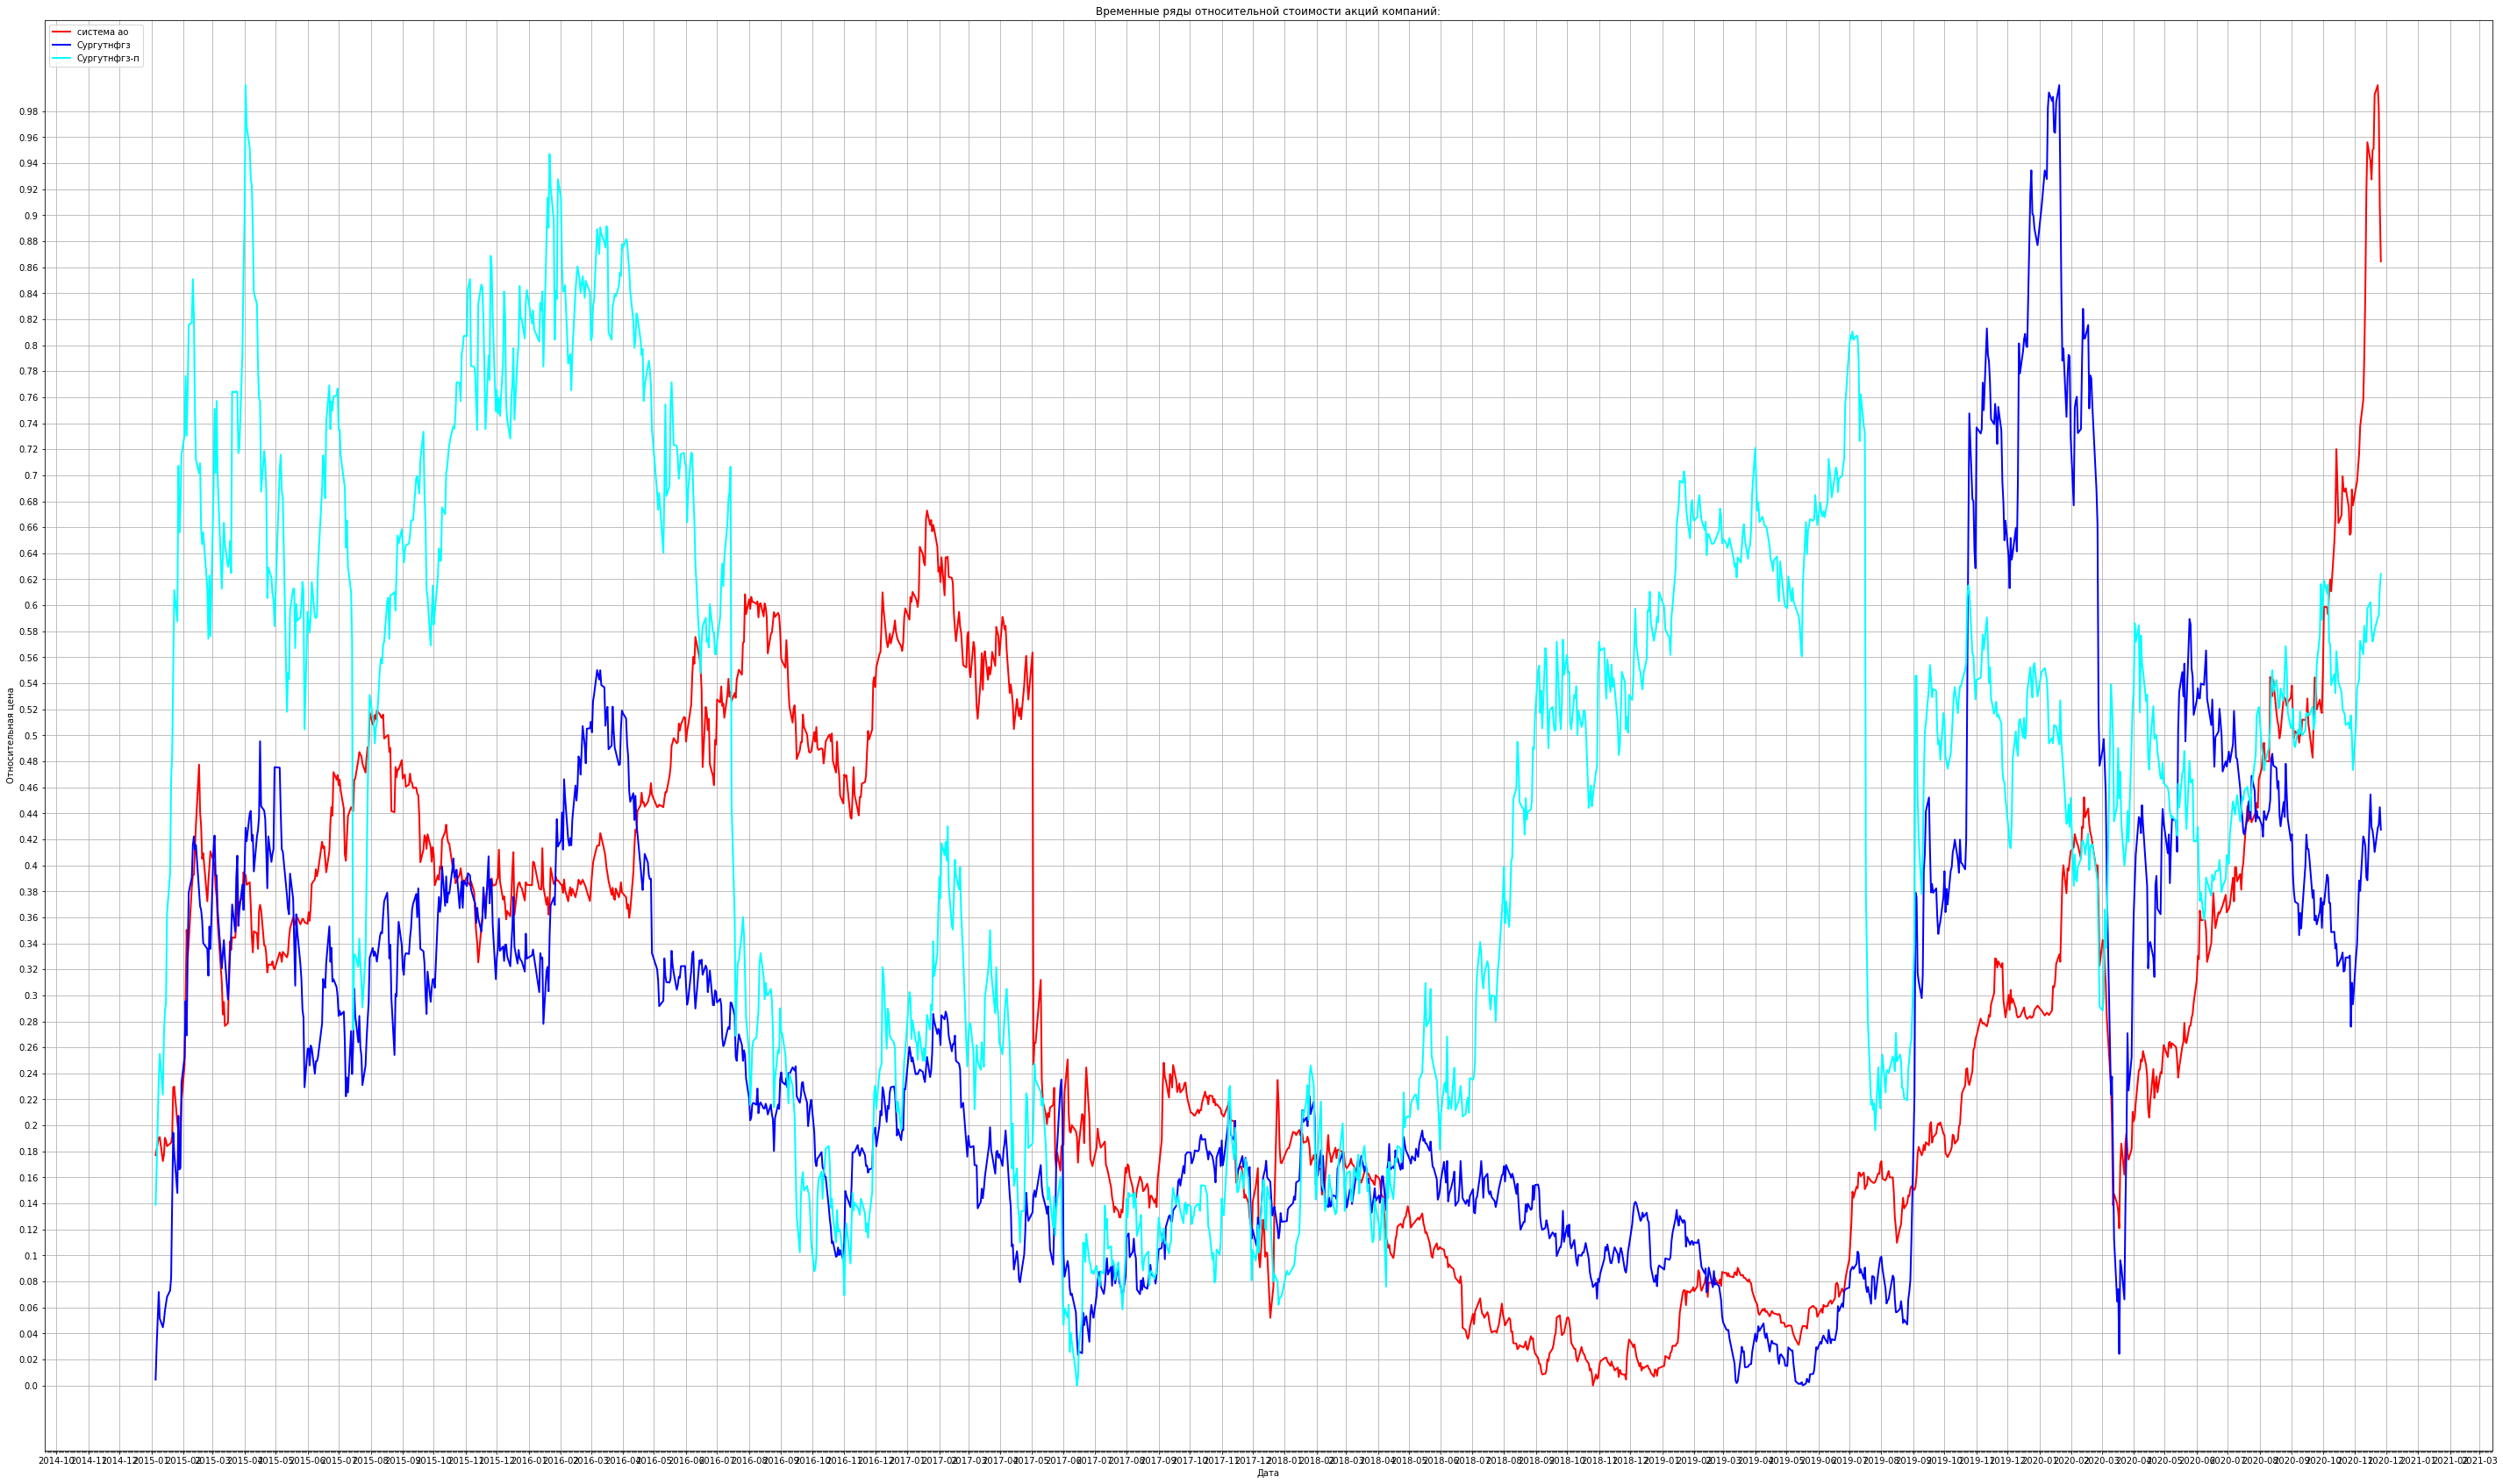

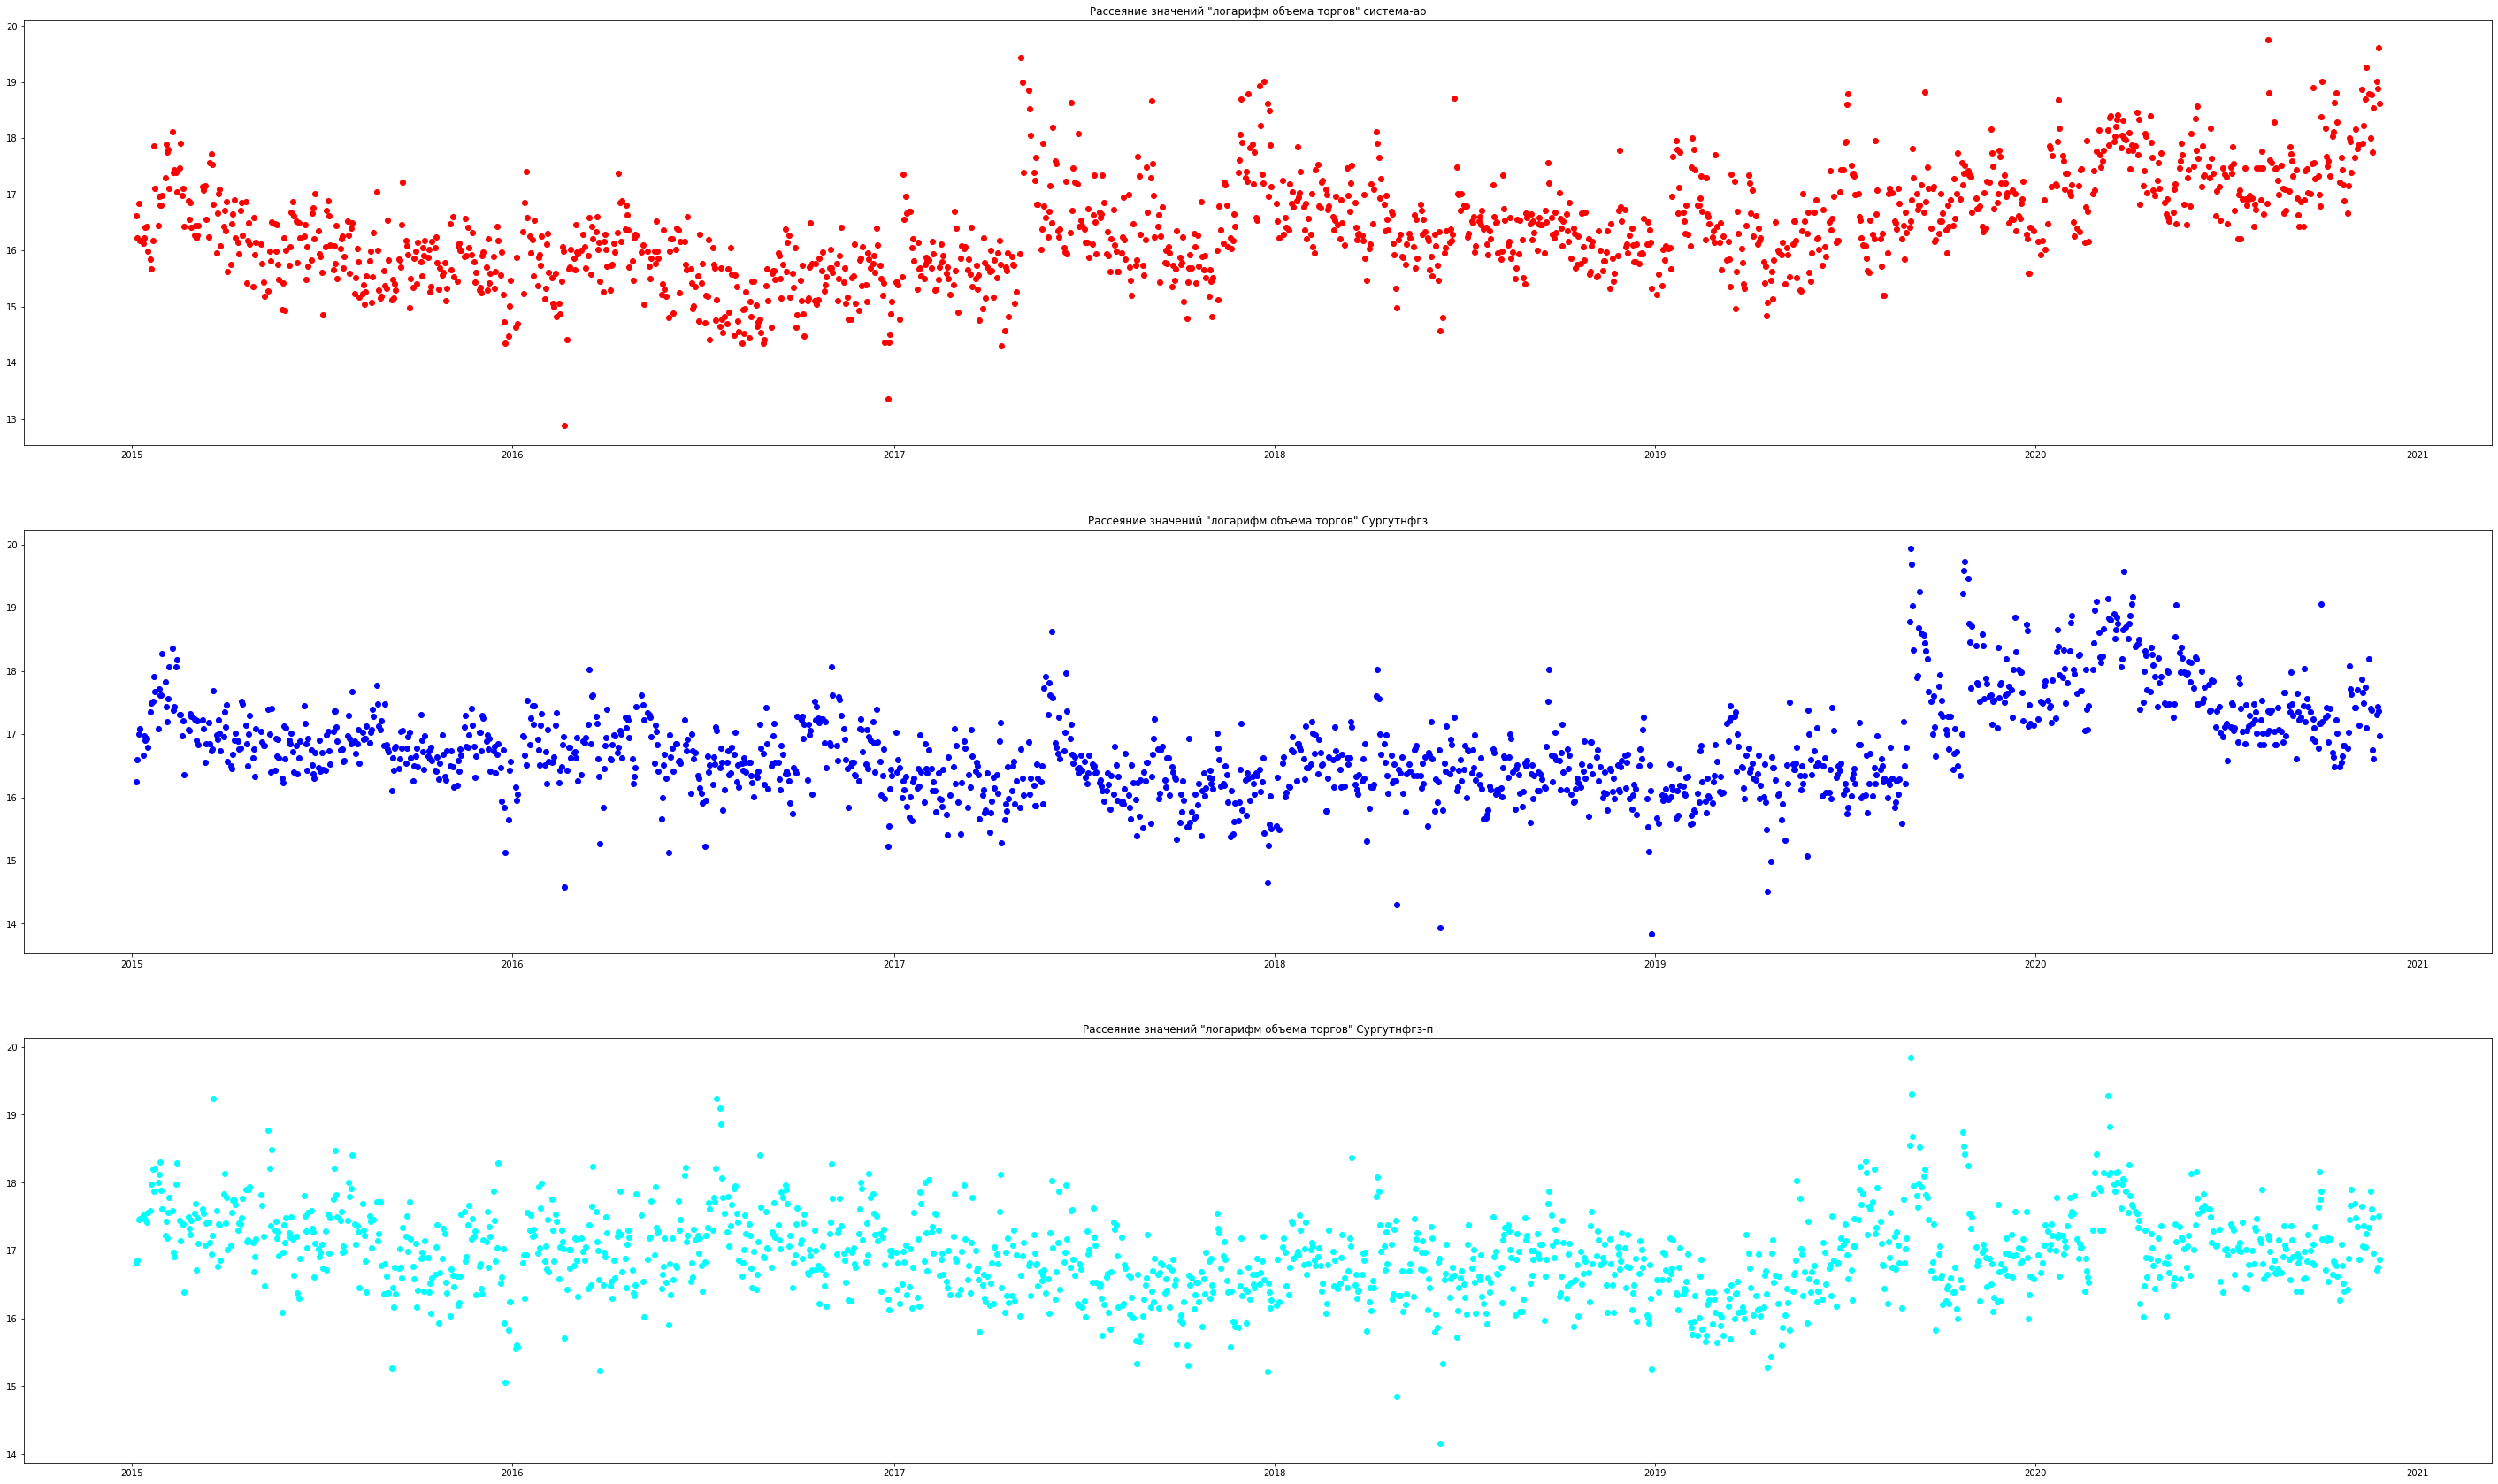

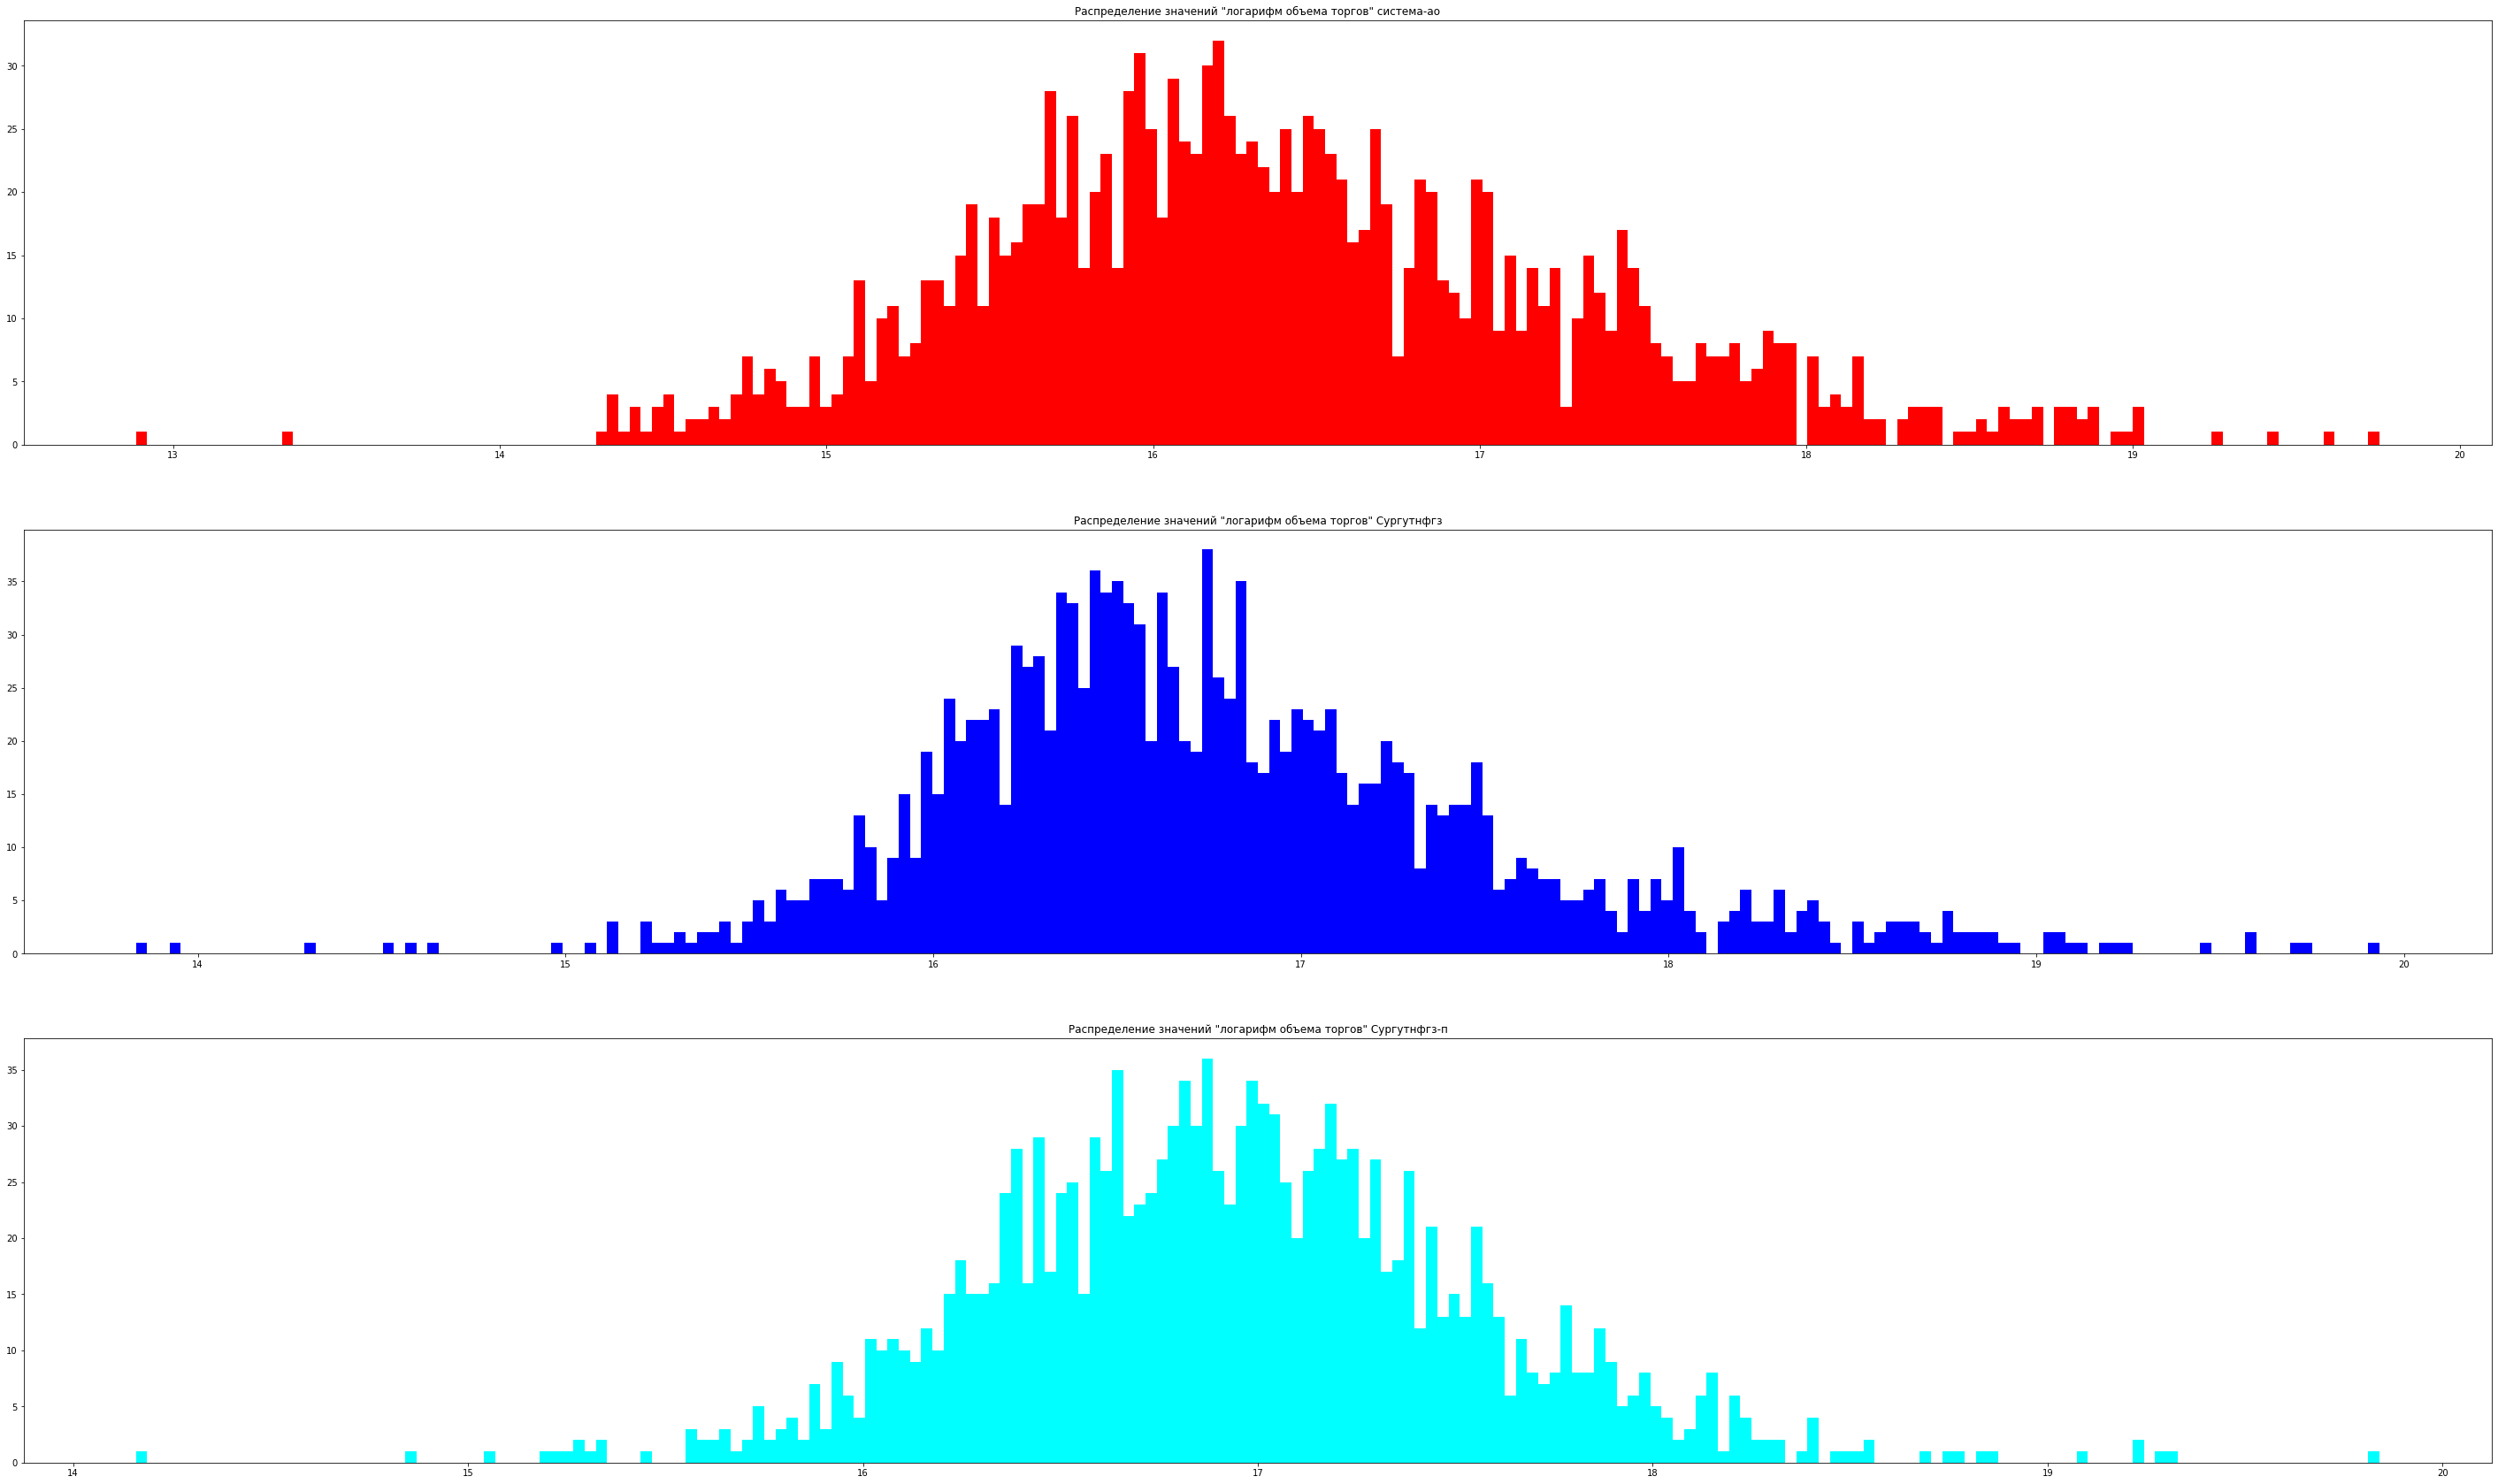

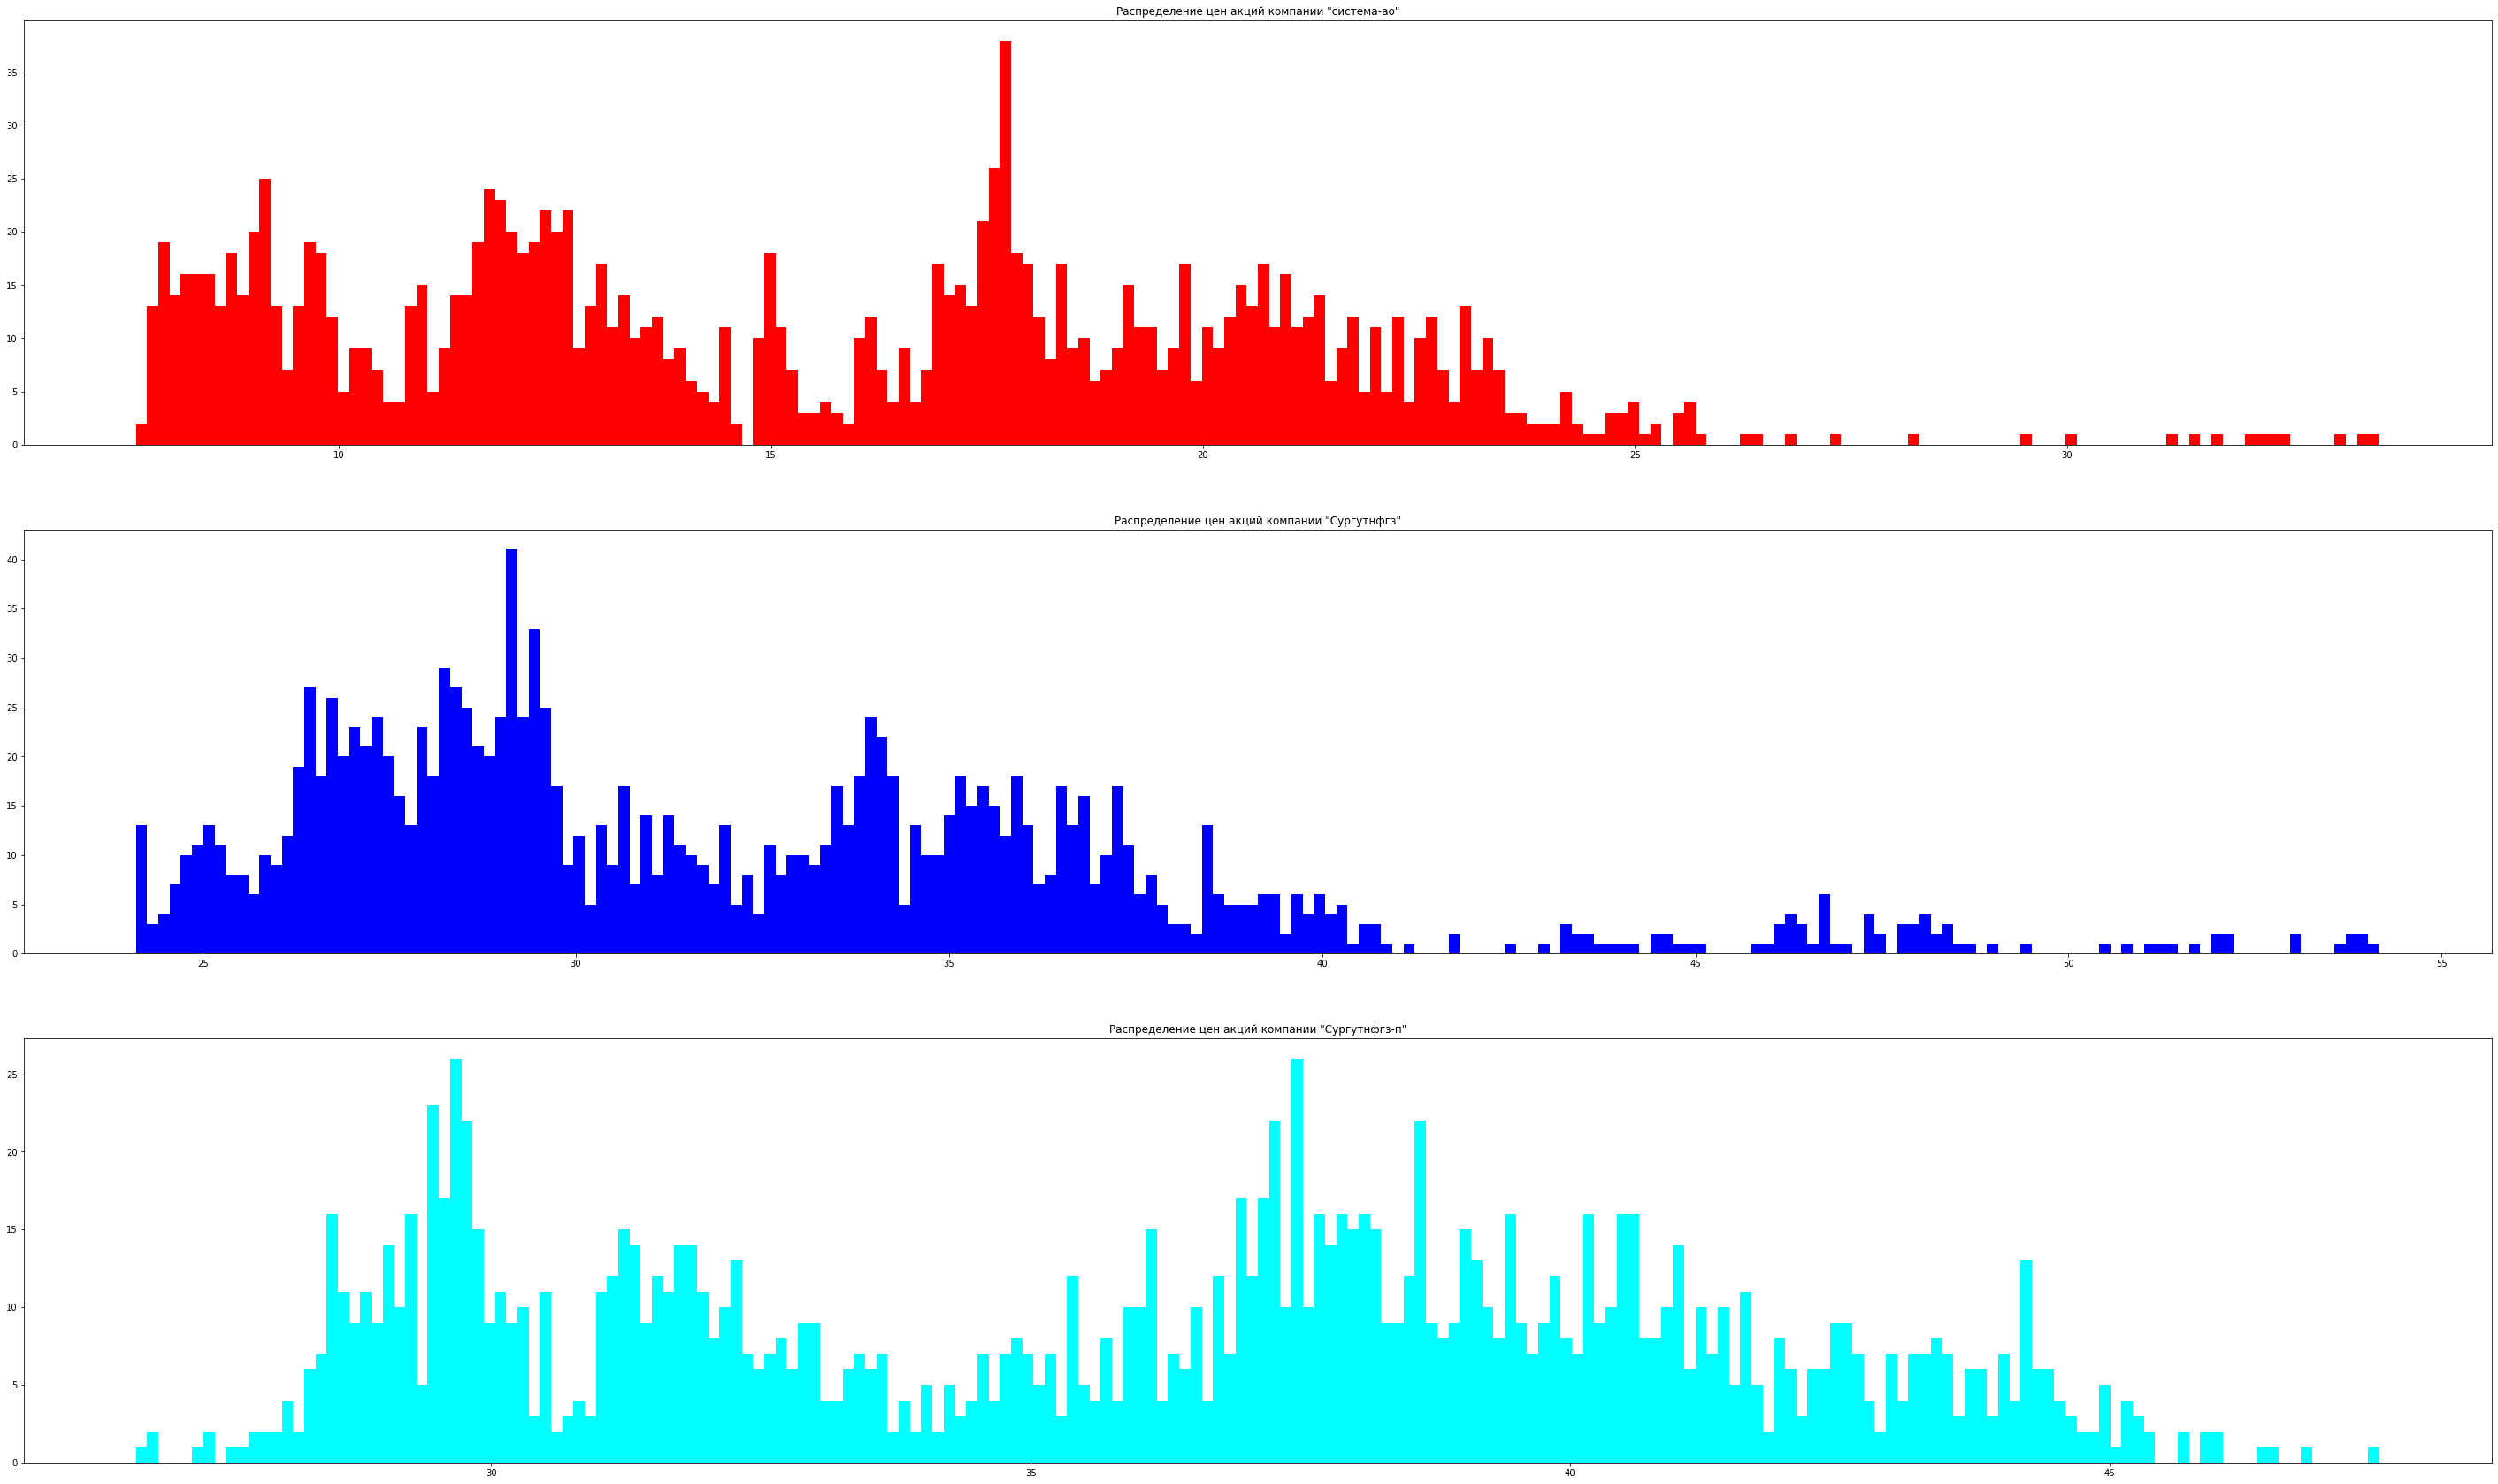

In [51]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime as dt
'''
Задание 2. Глава 3. Графики.
'''
class DayTrade(object):
    def __init__(self, ticker, date, close, vol, log_price, profitability, log_profitability,
                log_vol, relative_price):
        self.ticker = ticker
        self.date = date
        self.close = float(close)
        self.vol = float(vol)
        self.log_price = float(log_price)
        self.profitability = float(profitability)
        self.log_profitability = float(log_profitability)
        self.log_vol = float(log_vol)
        self.relative_price = float(relative_price)

def reader(path):
    days = []
    with open(path, 'r', encoding='utf=8') as file:
        reader = csv.DictReader(file, delimiter=';')
        for row in reader:
            days.append(DayTrade(*row.values()))
    return days

def date_reconstructor(date):
    day = int(date[:2])
    month = int(date[3:5])
    year = int(date[6:10])
    return dt.date(year, month, day)
    
    


if __name__ == "__main__":
    SAO_path_out = 'SAO_out.csv'
    SNG_path_out = 'SNG_out.csv'
    SNGP_path_out = 'SNGP_out.csv'
    
    SAO = reader(SAO_path_out)
    SNG = reader(SNG_path_out)
    SNGP = reader(SNGP_path_out)
    
    dates = [SAO_day.date for SAO_day in SAO]
    dates_data = [date_reconstructor(date) for date in dates]
    
    SAO_prices = np.array([SAO_day.relative_price for SAO_day in SAO])
    SNG_prices = np.array([SNG_day.relative_price for SNG_day in SNG])
    SNGP_prices = np.array([SNGP_day.relative_price for SNGP_day in SNGP])
    
    SAO_close = np.array([SAO_day.close for SAO_day in SAO])
    SNG_close = np.array([SNG_day.close for SNG_day in SNG])
    SNGP_close = np.array([SNGP_day.close for SNGP_day in SNGP])
    
    SAO_log_vol = [SAO_day.log_vol for SAO_day in SAO]
    SNG_log_vol = [SNG_day.log_vol for SNG_day in SNG]
    SNGP_log_vol = [SNGP_day.log_vol for SNGP_day in SNGP]
    
    months = mdates.MonthLocator()
    days = mdates.DayLocator()
    timeFmt = mdates.DateFormatter('%Y-%m')
    
    '''
    Задание 1
    '''
    fig, ax = plt.subplots(figsize=(50, 30))
    plt.plot(dates_data, SAO_prices, label='система ао', color='red', linewidth=2)
    plt.plot(dates_data, SNG_prices, label='Сургутнфгз', color='blue', linewidth=2)
    plt.plot(dates_data, SNGP_prices, label='Сургутнфгз-п', color='cyan', linewidth=2)
    plt.yticks([round(i * 0.02, 3) for i in range(50)], [str(round(i * 0.02, 3)) for i in range(50)])
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(timeFmt)
    ax.xaxis.set_minor_locator(days)
    plt.xlabel('Дата')
    plt.ylabel('Относительная цена')
    plt.title('Временные ряды относительной стоимости акций компаний:')
    plt.legend(loc='upper left')
    plt.grid(True)
    
    
    '''
    Задание 2
    '''
    fig_one, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(50, 30))
    ax1.scatter(dates_data, SAO_log_vol, color='red')
    ax1.set_title('Рассеяние значений "логарифм объема торгов" система-ао')
    
    ax2.scatter(dates_data, SNG_log_vol, color='blue')
    ax2.set_title('Рассеяние значений "логарифм объема торгов" Сургутнфгз')
   
    ax3.scatter(dates_data, SNGP_log_vol, color='cyan')
    ax3.set_title('Рассеяние значений "логарифм объема торгов" Сургутнфгз-п')
  

    '''
    Задание 3
    '''
    fig_two, (ax4, ax5, ax6) = plt.subplots(nrows=3, ncols=1, figsize=(50, 30))
    ax4.hist(SAO_log_vol, bins=200, color='red')
    ax4.set_title('Распределение значений "логарифм объема торгов" система-ао')
    ax5.hist(SNG_log_vol, bins=200, color='blue')
    ax5.set_title('Распределение значений "логарифм объема торгов" Сургутнфгз')
    ax6.hist(SNGP_log_vol, bins=200, color='cyan')
    ax6.set_title('Распределение значений "логарифм объема торгов" Сургутнфгз-п')
    
    '''
    Задание 5
    '''
    fig_three, (ax7, ax8, ax9) = plt.subplots(nrows=3, ncols=1, figsize=(50, 30))
    ax7.hist(SAO_close, bins=200, color='red')
    ax7.set_title('Распределение цен акций компании "система-ао"')
    ax8.hist(SNG_close, bins=200, color='blue')
    ax8.set_title('Распределение цен акций компании "Сургутнфгз"')
    ax9.hist(SNGP_close, bins=200, color='cyan')
    ax9.set_title('Распределение цен акций компании "Сургутнфгз-п"')